#### Author: Uday Routhu

#### Assignment: Hypothesis Testing with Insurance Data(Core)

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency

In [35]:
df = pd.read_csv('Data/insurance - insurance.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1. Do smokers have higher insurance charges than non-smokers?

#### Hypotheses:

- Null Hypothesis (H0): Smokers and non-smokers have the same average insurance charges.
    
- Alternative Hypothesis (H1): Smokers have higher average insurance charges than non-smokers.

#### Test Selection:

- I will use a two-sample t-test since we are comparing the means of two independent groups (smokers and non-smokers) 

with continuous data (insurance charges).

#### Assumptions:

  - No significant outliers
  - Normality
  - Equal Variance

#### Execution:

#### Getting the Group Data

In [38]:
# Separate charges for smokers and non-smokers
df['charges_smokers'] = df[df['smoker'] == 'yes']['charges']
df['charges_non_smokers'] = df[df['smoker'] == 'no']['charges']

df

,age,sex,bmi,children,smoker,region,charges,charges_smokers,charges_non_smokers
0,19,female,27.900,0,yes,southwest,16884.92400,16884.9240,NaN
1,18,male,33.770,1,no,southeast,1725.55230,NaN,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200,NaN,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061,NaN,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,NaN,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,NaN,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080,NaN,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350,NaN,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500,NaN,2007.94500


In [43]:
# Separate the column of interest based on the groups
charges_smokers_df = df[['charges', 'charges_smokers']].dropna()
charges_non_smokers_df = df[['charges', 'charges_non_smokers']].dropna()

# Calculate the number of rows in each group
num_charges_smokers = len(charges_smokers_df)
num_charges_non_smokers = len(charges_non_smokers_df)

# Print the number of rows in each group
print(f"There are {num_charges_smokers} rows in the 'charges_smokers' group.")
print(f"There are {num_charges_non_smokers} rows in the 'charges_non_smokers' group.")


There are 274 rows in the 'charges_smokers' group.
There are 1064 rows in the 'charges_non_smokers' group.


#### Visualize Group Means

In [44]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([charges_smokers_df, charges_non_smokers_df], axis=0)
plot_df

,charges,charges_smokers,charges_non_smokers
0,16884.9240,16884.9240,NaN
11,27808.7251,27808.7251,NaN
14,39611.7577,39611.7577,NaN
19,36837.4670,36837.4670,NaN
23,37701.8768,37701.8768,NaN
...,...,...,...
1332,11411.6850,NaN,11411.6850
1333,10600.5483,NaN,10600.5483
1334,2205.9808,NaN,2205.9808
1335,1629.8335,NaN,1629.8335


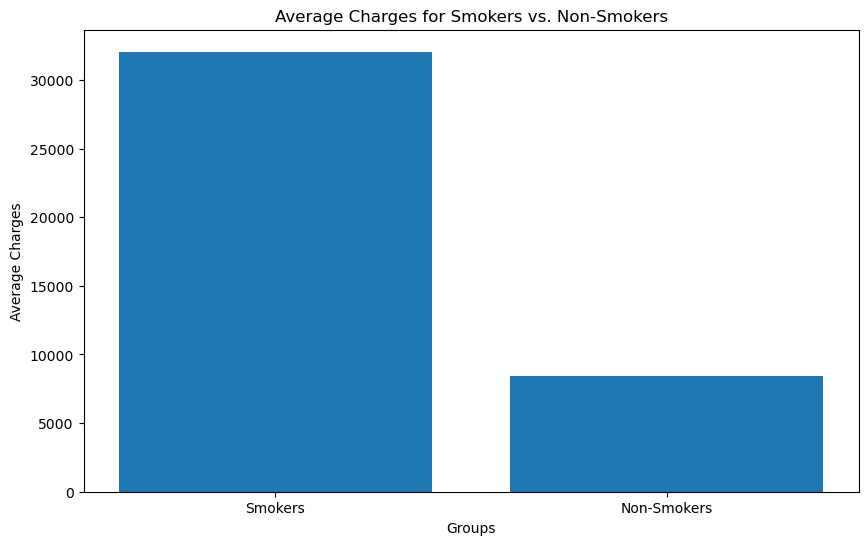

In [57]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(['Smokers', 'Non-Smokers'], [plot_df['charges_smokers'].mean(), plot_df['charges_non_smokers'].mean()])
plt.title('Average Charges for Smokers vs. Non-Smokers')
plt.xlabel('Groups')
plt.ylabel('Average Charges')
plt.show()

In [46]:
## now that we have visualized the groups, we can save a final smokers_group and non_smokers_group
# that are a pandas Series. This will make the rest of our workflow simpler than if 
# we still had a dataframe

smokers_group = charges_smokers_df['charges']
non_smokers_group = charges_non_smokers_df['charges']
display(smokers_group.head(), non_smokers_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

#### Checking Assumptions of 2-Sample T-test

#### Checking for Outliers

 - Check each group SEPARATELY!

In [47]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_smokers = np.abs(stats.zscore(smokers_group)) > 3
print(f"There are {is_outlier_smokers.sum()} outliers in the smokers group out of {len(smokers_group)})")

There are 0 outliers in the smokers group out of 274)


 - there is '0' outliers for smokers group so no need to remove ouliers

In [48]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_non_smokers = np.abs(stats.zscore(non_smokers_group)) > 3
print(f"There are {is_outlier_non_smokers.sum()} outliers in the non smokers group of out of {len(non_smokers_group)}.")

There are 24 outliers in the non smokers group of out of 1064.


In [49]:
## removing outliers from non_smokers_group
non_smokers_group = non_smokers_group.loc[~is_outlier_non_smokers]
non_smokers_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Checking for Normality

 - According to the workflow on the LP, since both groups have n > 15, we can safely ignore the assumption of normality.

#### Checking for Equal Variance

In [51]:
result = stats.levene(smokers_group, smokers_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


- Since the p-value (2.42e-97) is significantly less than the chosen significance level (e.g., 0.05), 
 we reject the null hypothesis.
 
- Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

### Statistical Test

In [53]:
result = stats.ttest_ind(smokers_group, non_smokers_group)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)


True

- The p-value for the t-test is extremely close to zero, which is significantly less than the chosen significance level (e.g., 0.05). Since the p-value is much less than 0.05, we reject the null hypothesis.
- In order to know if they are funded significantly MORE or LESS, we look at the actual means of our final groups.

In [54]:
print(f"The average charges for smokers groups was {smokers_group.mean():.2f}")
print(f"The average charges for non smokers groups was {non_smokers_group.mean():.2f}")

The average charges for smokers groups was 32050.23
The average charges for non smokers groups was 7939.86


 - smokers groups are charges at significantly higher amounts than non smokers groups.

### Q2. Are men more likely to smoke than women?

#### Hypotheses:

- Null Hypothesis (H0): The proportion of men who smoke is the same as the proportion of women who smoke.
- Alternative Hypothesis (H1): The proportion of men who smoke is different from the proportion of women who smoke.

#### Test Selection:

- We will use a chi-squared test of independence since we are comparing two categorical variables (gender and smoking status) 
to determine if they are independent or associated.

#### Assumptions:

- The data is categorical, and observations are independent.

#### Execution:

- Let's perform the chi-squared test

In [7]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-squared statistic: {chi2}')
print(f'P-value: {p_value}')


Chi-squared statistic: 7.39291081459996
P-value: 0.006548143503580696


#### Interpretation:

- Since the p-value (0.0065) is less than the significance level (commonly set at 0.05), we reject the null hypothesis.
- This indicates that there is a statistically significant association between gender and smoking status.

#### Supporting Visualization:

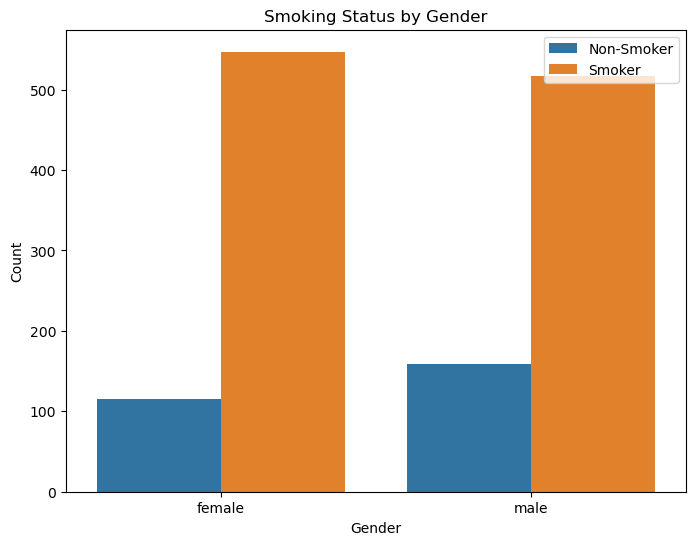

In [8]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='smoker')
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='', loc='upper right', labels=['Non-Smoker', 'Smoker'])
plt.show()

#### Conclusion:

In the context of this specific analysis, 
it suggests that the proportion of men who smoke is different from the proportion of women who smoke. 
Therefore, based on the data, it appears that there is a difference in smoking habits between men and women.


### Q3. Do different regions have different charges, on average?

#### Test Selection:

- We used an analysis of variance levene test to compare the means of multiple groups (regions) to determine if there is a 
significant difference in their average charges.

#### Assumptions

- Formulate Hypotheses: 
                        
                        - Null Hypothesis (H0): The variances of the groups are equal (homoscedastic).
                        - Alternative Hypothesis (H1): At least one group has a different variance (heteroscedastic).
- Perform Levene's Test: 
                         
                         - Calculate the Levene's test statistic.
                         - Calculate the associated p-value.
- Evaluate Results: 
                     
                     - If the p-value is greater than the chosen significance level (e.g., 0.05), you fail to reject the null hypothesis, indicating that the assumption of homogeneity of variances is met.
                     - If the p-value is less than the significance level, you reject the null hypothesis, indicating a violation of the assumption.

#### Formulate Hypotheses:

H0 (Null Hypothesis): 
     The assumption is that the variances of insurance charges in each region (Southwest, Southeast, Northwest, Northeast) are approximately equal, indicating homogeneity of variances.

H1 (Alternative Hypothesis): 
     The alternative hypothesis suggests that at least one region has a different variance in insurance charges compared to the others, indicating heteroscedasticity.

#### Perform Levene's Test::

In [33]:
from scipy.stats import levene

# Perform Levene's test
result_levene = levene(
    df[df['region'] == 'southwest']['charges'],
    df[df['region'] == 'southeast']['charges'],
    df[df['region'] == 'northwest']['charges'],
    df[df['region'] == 'northeast']['charges']
)

# Extract Levene's test statistic and p-value
levene_statistic = result_levene.statistic
levene_p_value = result_levene.pvalue

# Print the results of Levene's test
print("Levene's Test Statistic:", levene_statistic)
print("Levene's Test P-value:", levene_p_value)


Levene's Test Statistic: 5.559966758410606
Levene's Test P-value: 0.0008610590250786703


#### Evaluate Results:

Since the Levene's test p-value is less than the chosen significance level (e.g., 0.05), this indicates that the assumption 
of homogeneity of variances is violated. 
In other words, the variances within at least one of the groups (regions) are 
significantly different from the others.

Given above assumption, it is appropriate to use an alternative non-parametric test, such as the Kruskal-Wallis 
test, to compare charges among different regions. 

The Kruskal-Wallis test does not rely on the assumption of equal variances.

#### Kruskal-Wallis test

In [34]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
result_kruskal = kruskal(
    df[df['region'] == 'southwest']['charges'],
    df[df['region'] == 'southeast']['charges'],
    df[df['region'] == 'northwest']['charges'],
    df[df['region'] == 'northeast']['charges']
)

# Extract Kruskal-Wallis test statistic and p-value
kruskal_statistic = result_kruskal.statistic
kruskal_p_value = result_kruskal.pvalue

# Print the results of the Kruskal-Wallis test
print("Kruskal-Wallis Test Statistic:", kruskal_statistic)
print("Kruskal-Wallis Test P-value:", kruskal_p_value)


Kruskal-Wallis Test Statistic: 4.734181215658743
Kruskal-Wallis Test P-value: 0.19232908072121002


#### Interpretation:

In the Kruskal-Wallis test, the null hypothesis is that there is no significant difference in average charges among 
different regions, and the alternative hypothesis is that there is a significant difference.

The test statistic is 4.7342.
The associated p-value is 0.1923.

Since the p-value (0.1923) is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis. This means that there is insufficient evidence to conclude that there is a significant difference in average charges among different regions.

In summary, based on the Kruskal-Wallis test, there is no significant difference in average charges among the regions. 

This finding suggests that, on average, the charges are similar across different regions.

#### Supporting Visualization

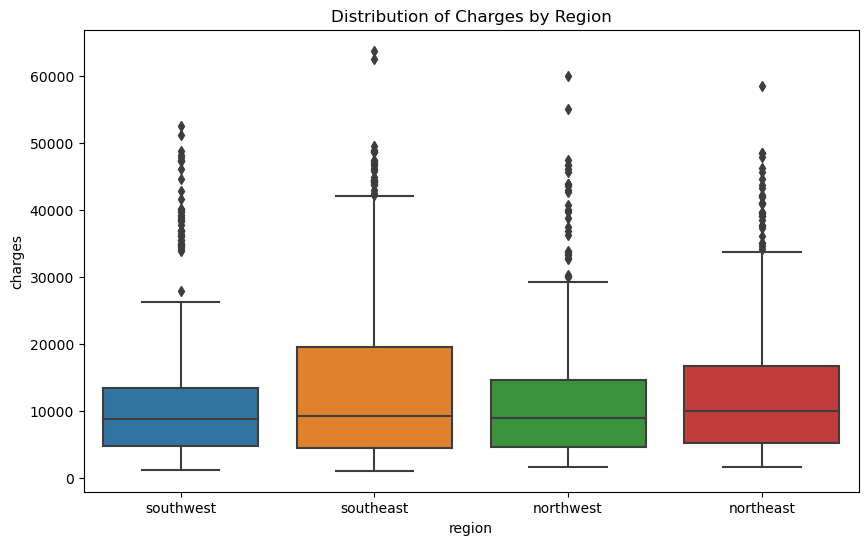

In [11]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Distribution of Charges by Region')
plt.show()


#### Conclusion:

- There is a significant difference in average insurance charges among different regions.